Name: Yesha Patel(000790164), Urvashiben Thakkar(000789927)

LTU Honor Code: "I pledge that on all academic work that I submit, I will neither give nor receive unauthorized aid, nor will I present another person's work as my own."

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #google drive mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil

IDs = ['A042', 'A069', 'A449', 'A980', 'B461', 'C708', 'F044', 'H298', 'J282',
       'K603', 'K629', 'N066', 'R903', 'S941', 'U927', 'V988', 'Y164']

# Directories for MC1
b_dir = '/content/drive/My Drive/FPD/FPD_MC3_ALL'  #my directory path
train_dir = b_dir+'/train/'
vali_dir = b_dir+'/validation/'
test_dir = b_dir+'/test/'
#test1_dir = b_dir+'/test1/'
def print_tot_num_images():
  for fn in IDs:
    trn = len(os.listdir (train_dir+fn))
    val = len(os.listdir (vali_dir+fn))
    tst = len(os.listdir (test_dir+fn))
    print(f"    ID: {fn} (train, vali, test) = ({trn}, {val}, {tst})")

print_tot_num_images()

    ID: A042 (train, vali, test) = (162, 18, 20)
    ID: A069 (train, vali, test) = (162, 18, 20)
    ID: A449 (train, vali, test) = (162, 18, 20)
    ID: A980 (train, vali, test) = (162, 18, 20)
    ID: B461 (train, vali, test) = (159, 18, 23)
    ID: C708 (train, vali, test) = (162, 18, 20)
    ID: F044 (train, vali, test) = (162, 18, 20)
    ID: H298 (train, vali, test) = (162, 18, 20)
    ID: J282 (train, vali, test) = (162, 18, 20)
    ID: K603 (train, vali, test) = (162, 18, 20)
    ID: K629 (train, vali, test) = (162, 18, 20)
    ID: N066 (train, vali, test) = (162, 18, 20)
    ID: R903 (train, vali, test) = (162, 18, 20)
    ID: S941 (train, vali, test) = (162, 18, 20)
    ID: U927 (train, vali, test) = (162, 18, 20)
    ID: V988 (train, vali, test) = (126, 18, 16)
    ID: Y164 (train, vali, test) = (162, 18, 20)


In [ ]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(300, 500),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(300, 500),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(300, 500),
    batch_size=32,
    shuffle=False)

Found 2715 files belonging to 17 classes.
Found 306 files belonging to 17 classes.
Found 339 files belonging to 17 classes.


# **Model 1: CNN for Multi Class Classification 3**

In [ ]:
#importing libraries
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint


#data augmentation for model
data_augmentation = keras.Sequential(
    [
        #layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
        layers.RandomTranslation(0.1, 0.1)
    ]
)

In [ ]:
inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(17, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

m=model
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 500, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 250, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 250, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 125, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 125, 64)       18496 

In [ ]:
#printing shape of data
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 300, 500, 3)
labels batch shape: (32,)


In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/drive/My Drive/h5/fingers_modelMC3a.h5",
        save_best_only=True,
        monitor="val_loss")
]

history = m.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
85/85 [==============================] - 510s 6s/step - loss: 3.6387 - accuracy: 0.1020 - val_loss: 2.3659 - val_accuracy: 0.2059
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 16s 169ms/step - loss: 2.0899 - accuracy: 0.3223 - val_loss: 1.6208 - val_accuracy: 0.5098
Epoch 3/30
85/85 [==============================] - 16s 170ms/step - loss: 1.4054 - accuracy: 0.5650 - val_loss: 1.1443 - val_accuracy: 0.6307
Epoch 4/30
85/85 [==============================] - 15s 169ms/step - loss: 0.9756 - accuracy: 0.6980 - val_loss: 0.9145 - val_accuracy: 0.7353
Epoch 5/30
85/85 [==============================] - 15s 168ms/step - loss: 0.6884 - accuracy: 0.7934 - val_loss: 0.6402 - val_accuracy: 0.8072
Epoch 6/30
85/85 [==============================] - 16s 169ms/step - loss: 0.5599 - accuracy: 0.8258 - val_loss: 0.7276 - val_accuracy: 0.8007
Epoch 7/30
85/85 [==============================] - 15s 162ms/step - loss: 0.4356 - accuracy: 0.8700 - val_loss: 0.6114 - val_accuracy: 0.8366
Epoch 8/30
85/85 [==============================] - 15s 167ms/step - loss: 0.3858 - accuracy: 0.8729 - val_loss: 0.5257 - val_accuracy: 0.8431
Epoch 9/30

In [ ]:
m.save('/drive/My Drive/h5/fingers_modelMC3a.h5') # best model save in folder

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.16827768087387085
Final Validation Loss: 0.5608411431312561
Final Training Accuracy: 94.47513818740845
Final Validation Accuracy: 87.25489974021912


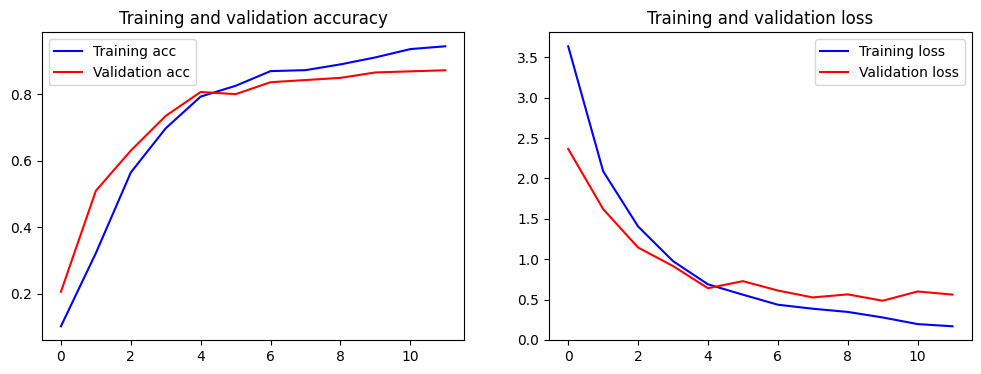

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break
#print(test_data_batch[0]) #float32

test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


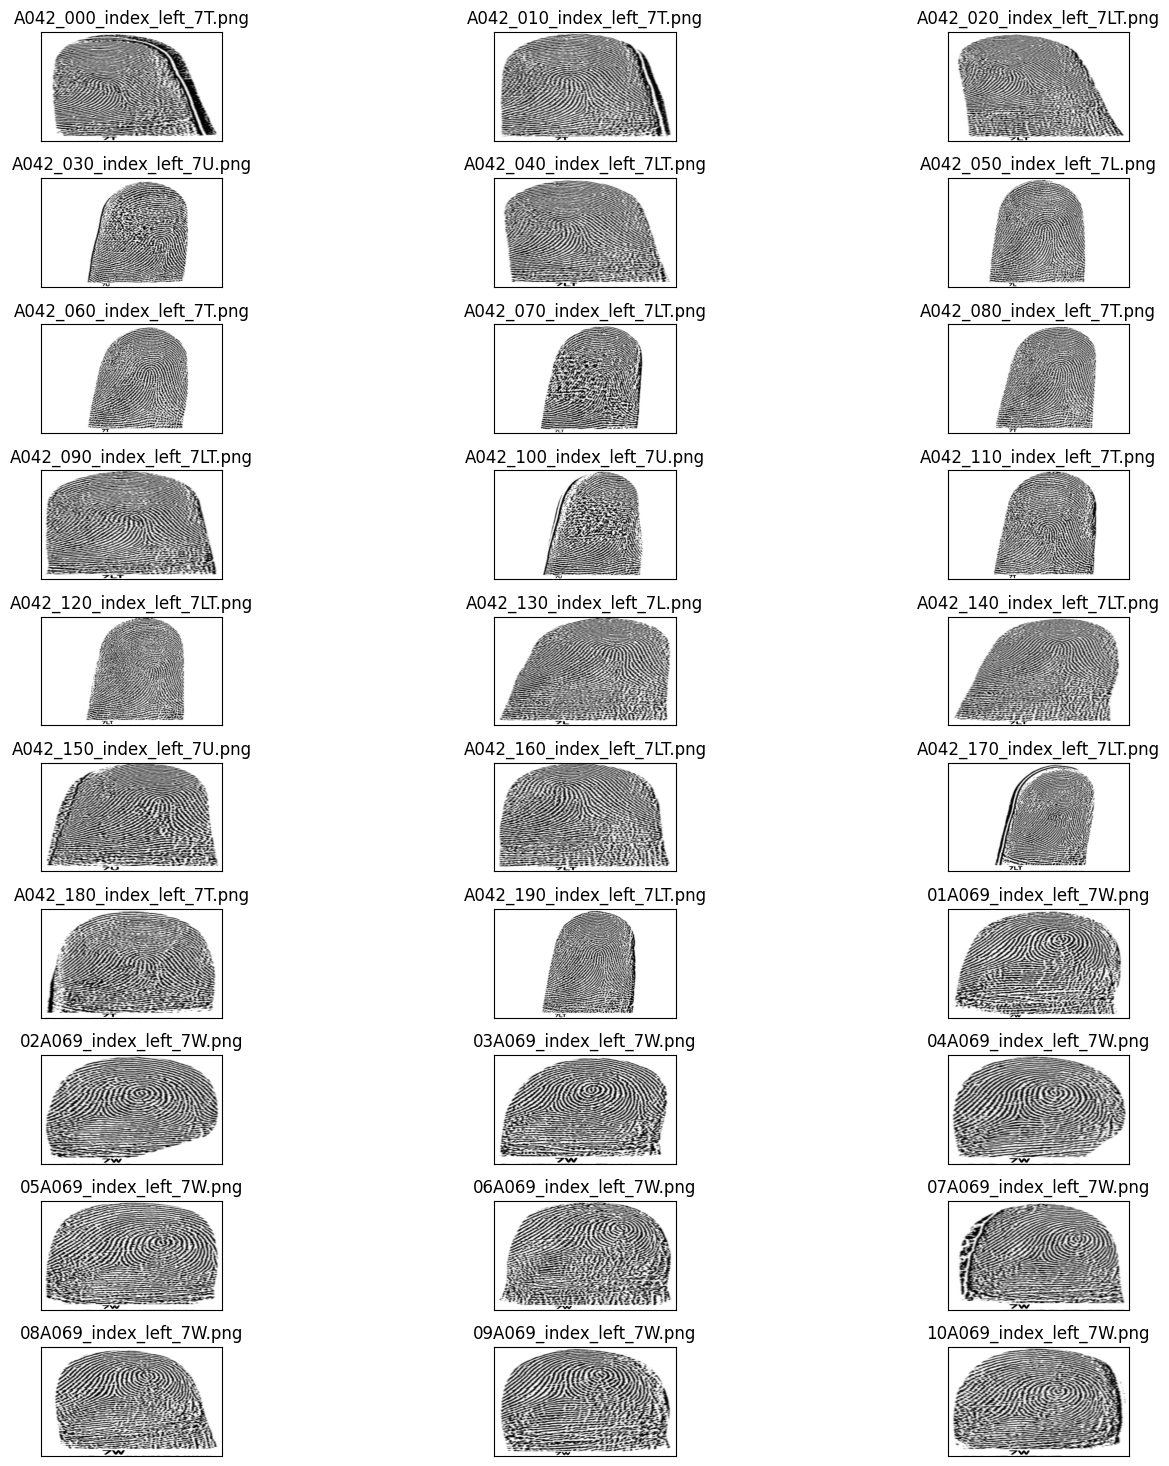

In [ ]:
# Displaying images from test dataset
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.tight_layout()
    plt.imshow(test_data_batch[i].numpy().astype("uint8"))

    # Get the image filename
    image_name = test_dataset.file_paths[i].split('/')[-1]  # Assuming '/' as the path separator
    plt.title(image_name)  # Set the image name as the title

    plt.xticks([])
    plt.yticks([])

plt.show()


In [ ]:
#model evaluation using test dataset
test_loss1, test_acc1 = m.evaluate(test_dataset)
print(f"Test accuracy for CNN: {100*test_acc1:.3f}")

11/11 [==============================] - 69s 7s/step - loss: 1.1715 - accuracy: 0.6578
Test accuracy for CNN: 65.782


# **Model 2: Pre-Trained for Multi Class Classification 3 - ResNet50**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
#from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score



# Load ResNet50 convolutional base
resnet50_base = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(300, 500, 3)
)

# Freeze all layers in the pre-trained model
resnet50_base.trainable = False

# Build model on top of convolutional base
inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = resnet50_base(inputs, training=False)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(17, activation='softmax')(x)
model_resnet50 = keras.Model(inputs, outputs)


# Compile the model
model_resnet50.compile(optimizer='rmsprop',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
model_resnet50.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 10, 16, 2048)      23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 17)                4369 

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/h5/MC3_FT.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
85/85 [==============================] - ETA: 0s - loss: 4.9833 - accuracy: 0.2169

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 32s 300ms/step - loss: 4.9833 - accuracy: 0.2169 - val_loss: 2.2777 - val_accuracy: 0.2778
Epoch 2/30
85/85 [==============================] - 19s 203ms/step - loss: 2.2448 - accuracy: 0.3053 - val_loss: 1.8782 - val_accuracy: 0.3824
Epoch 3/30
85/85 [==============================] - 19s 200ms/step - loss: 1.9838 - accuracy: 0.3591 - val_loss: 1.8374 - val_accuracy: 0.4020
Epoch 4/30
85/85 [==============================] - 18s 194ms/step - loss: 1.8448 - accuracy: 0.4103 - val_loss: 1.5927 - val_accuracy: 0.5000
Epoch 5/30
85/85 [==============================] - 18s 200ms/step - loss: 1.7411 - accuracy: 0.4523 - val_loss: 1.3513 - val_accuracy: 0.5425
Epoch 6/30
85/85 [==============================] - 19s 201ms/step - loss: 1.5775 - accuracy: 0.4807 - val_loss: 1.3139 - val_accuracy: 0.6275
Epoch 7/30
85/85 [==============================] - 18s 200ms/step - loss: 1.5189 - accuracy: 0.5083 - val_loss: 1.2356 - val_accuracy: 0.6176
Epoch 8/30

In [ ]:
# Unfreeze some top layers of the pre-trained model for fine-tuning
resnet50_base.trainable = True
# Fine-tune from this layer onwards
for layer in resnet50_base.layers[:-4]:
    layer.trainable = False

# Recompile the model for fine-tuning
model_resnet50.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/h5/MC3_FT.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
85/85 [==============================] - 23s 214ms/step - loss: 0.8995 - accuracy: 0.6785 - val_loss: 0.8366 - val_accuracy: 0.7647
Epoch 2/30
85/85 [==============================] - 19s 202ms/step - loss: 0.8375 - accuracy: 0.7050 - val_loss: 0.8132 - val_accuracy: 0.7680
Epoch 3/30
85/85 [==============================] - 19s 200ms/step - loss: 0.8037 - accuracy: 0.7098 - val_loss: 0.8056 - val_accuracy: 0.7778
Epoch 4/30
85/85 [==============================] - 19s 205ms/step - loss: 0.8030 - accuracy: 0.7101 - val_loss: 0.7924 - val_accuracy: 0.7908
Epoch 5/30
85/85 [==============================] - 18s 199ms/step - loss: 0.7698 - accuracy: 0.7271 - val_loss: 0.7823 - val_accuracy: 0.7876
Epoch 6/30
85/85 [==============================] - 19s 207ms/step - loss: 0.7684 - accuracy: 0.7153 - val_loss: 0.7713 - val_accuracy: 0.8007
Epoch 7/30
85/85 [==============================] - 17s 180ms/step - loss: 0.7845 - accuracy: 0.7160 - val_loss: 0.7767 - val_accuracy: 0.7974

In [ ]:
model_resnet50.save('/content/drive/MyDrive/h5/MC3_FT.h5') # best model save in folder

In [ ]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.16827768087387085
Final Validation Loss: 0.5608411431312561
Final Training Accuracy: 94.47513818740845
Final Validation Accuracy: 87.25489974021912


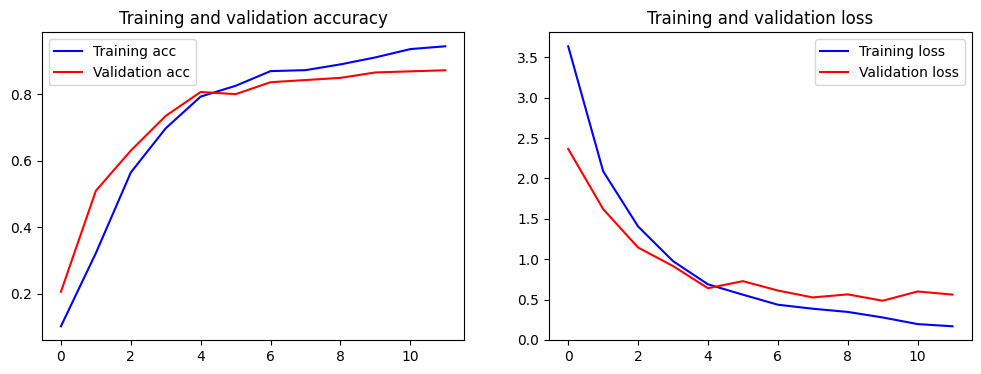

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model_resnet50.evaluate(test_dataset)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 [==============================] - 3s 250ms/step - loss: 0.7181 - accuracy: 0.7788
Test Loss: 0.7180525064468384
Test Accuracy: 0.778761088848114


test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


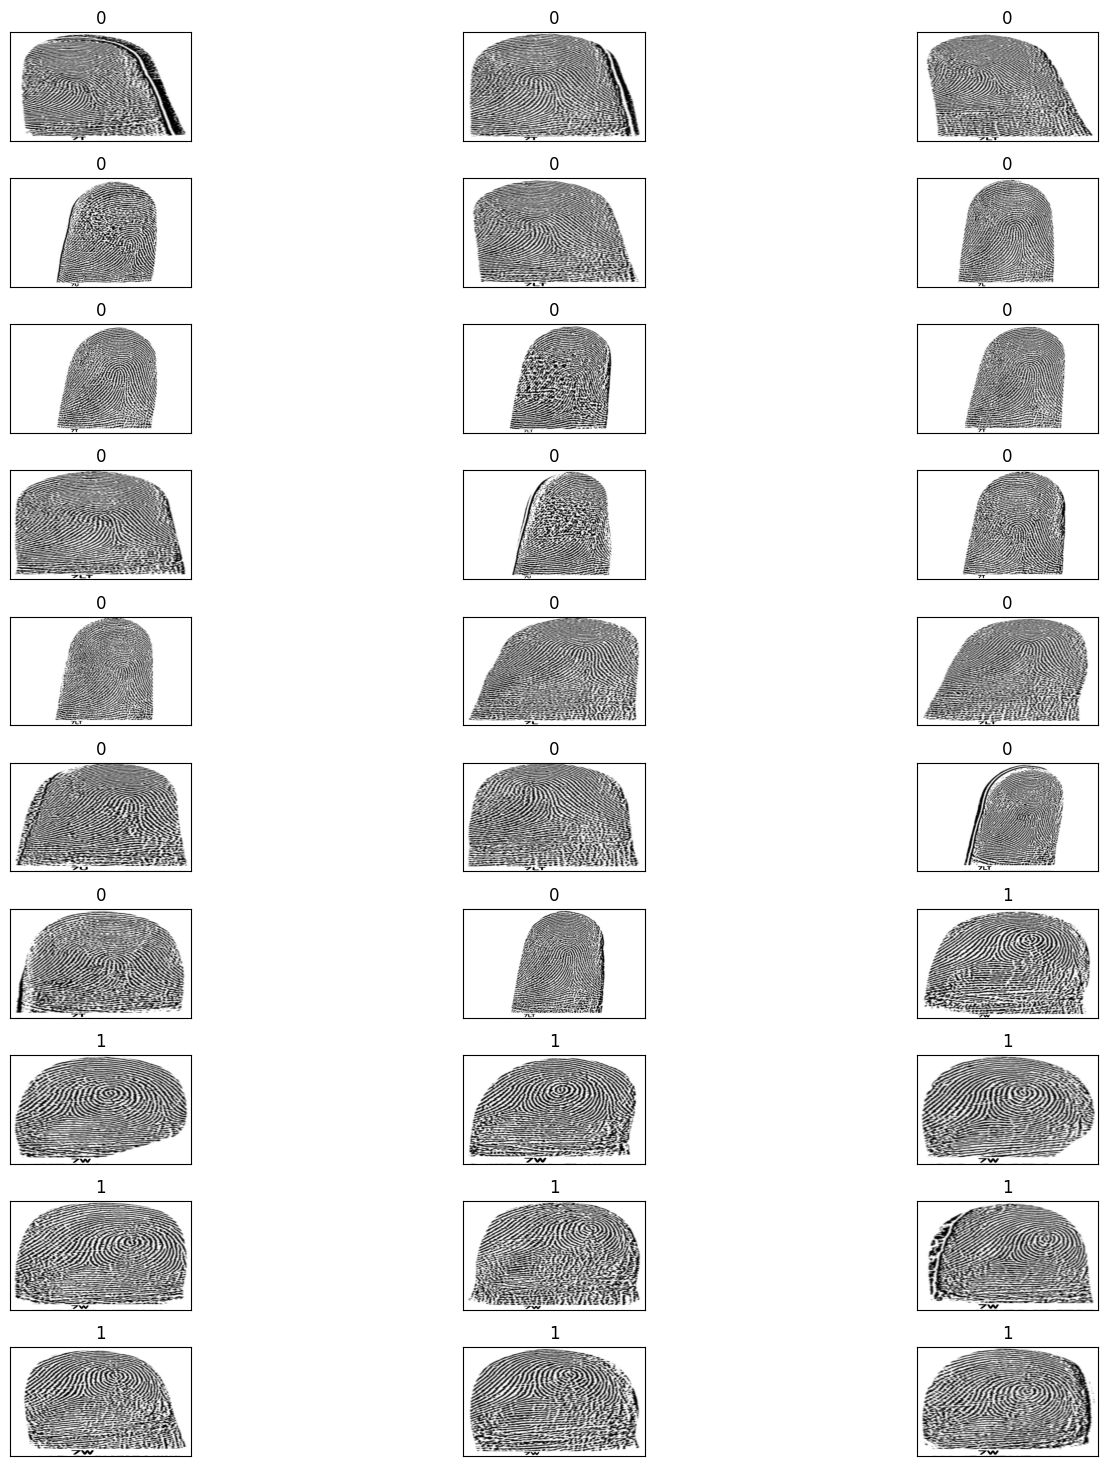

In [ ]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  plt.imshow(test_data_batch[i].numpy().astype("uint8"))
  plt.title(f"{test_labels_batch[i]}")
  plt.xticks([])
  plt.yticks([])

11/11 [==============================] - 3s 155ms/step
Confusion Matrix:
[[17  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0]
 [ 0 14  4  0  0  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  7  9  0  0  0  2  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 17  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  8  3  1  4  0  0  1  0  0  1]
 [ 0  0  0  0  0  1  0  3  9  4  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1 16  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  7  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  4  1  1  0  0  2  1  0  0 11]]


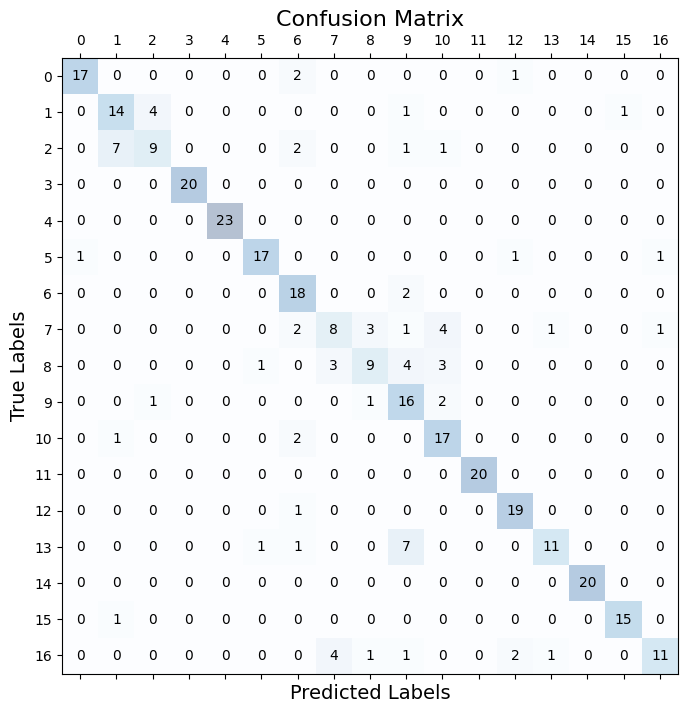

In [ ]:
from matplotlib.ticker import MultipleLocator

# Predict labels for the test dataset
predictions = model_resnet50.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_dataset:
    true_labels.extend(labels.numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='medium')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.7745069613535772


# **Avarage Esemble models**


In [ ]:
# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelMC3a.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/h5/MC3_FT.h5')

test_loss1, test_acc1 = model1.evaluate(test_dataset)
test_loss2, test_acc2 = model2.evaluate(test_dataset)

ensemble_accuracy = (test_acc1 + test_acc2) / 2
print(f"Ensemble accuracy: {ensemble_accuracy:.2f}%")

# Make predictions
pred1 = model1.predict(test_dataset)
pred2 = model2.predict(test_dataset)

# Convert predictions to probabilities
prob1 = pred1.squeeze()  # Assuming pred1 has shape (batch_size, 1), squeeze to remove singleton dimension
prob2 = pred2.squeeze()  # Assuming pred2 has shape (batch_size, 1), squeeze to remove singleton dimension

# Now prob1 and prob2 contain class probabilities for the positive class
# finalpred=(pred1+pred2)/2
# print(finalpred)



# Calculate overall probability
overall_prob = np.mean([prob1, prob2], axis=0)

print(overall_prob)

11/11 [==============================] - 3s 148ms/step - loss: 0.7181 - accuracy: 0.7788
Ensemble accuracy: 0.72%
11/11 [==============================] - 3s 149ms/step
[[6.9270211e-01 5.1129196e-04 1.0947667e-03 ... 1.4229712e-05
  7.8495737e-05 4.8366517e-02]
 [8.0815077e-01 4.5487974e-03 1.6386852e-02 ... 5.7991205e-05
  4.1497693e-05 4.4849928e-02]
 [5.2832705e-01 1.1045164e-04 2.0244850e-03 ... 1.4737859e-07
  3.4517161e-06 1.1623316e-01]
 ...
 [1.0208374e-02 8.2520945e-03 3.2070342e-02 ... 9.0802583e-05
  8.7826336e-03 2.0357077e-01]
 [2.8626114e-01 1.4987488e-03 2.4518543e-03 ... 1.9390527e-03
  8.2121687e-03 6.4906907e-01]
 [5.4255120e-02 4.2150110e-02 2.8275838e-02 ... 1.2714068e-04
  2.6597306e-02 1.3981253e-01]]


1/1 [==============================] - 1s 969ms/step


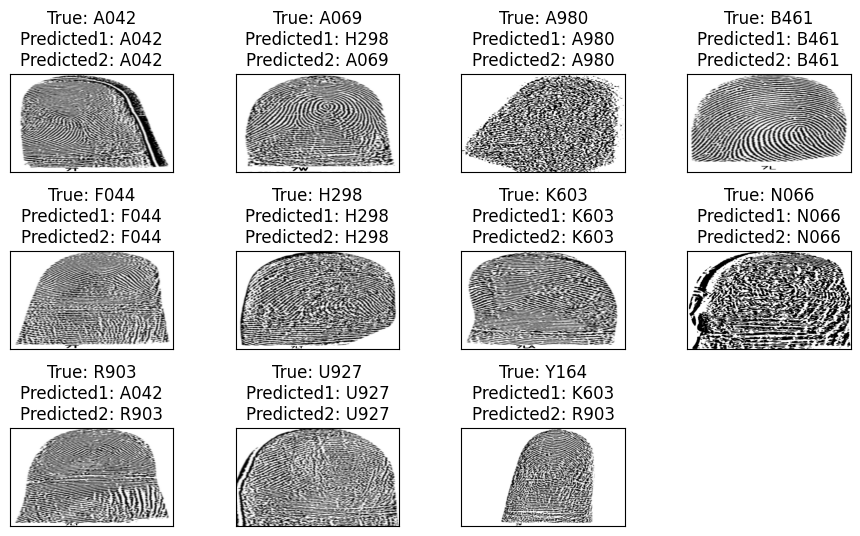

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os

# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelMC3a.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/h5/MC3_FT.h5')

# Define class labels
class_labels = ['A042', 'A069', 'A449', 'A980', 'B461', 'C708', 'F044', 'H298', 'J282',
                'K603', 'K629', 'N066', 'R903', 'S941', 'U927', 'V988', 'Y164']

# Initialize the figure
plt.figure(figsize=(9, 9))

# Iterate through the test dataset and make predictions
for i, (test_data_batch, test_labels_batch) in enumerate(test_dataset):
    if i >= 20:  # Displaying only 30 images
        break

    plt.subplot(5, 4, i + 1)
    plt.tight_layout()
    plt.imshow(test_data_batch[0].numpy().astype("uint8"))  # Assuming batch size is 1

    # Make predictions using both models
    pred1 = model1.predict(test_data_batch)
    pred2 = model2.predict(test_data_batch)

    # Convert predictions to class labels
    label1 = class_labels[np.argmax(pred1[0])]
    label2 = class_labels[np.argmax(pred2[0])]

    # Get the true label
    true_label = class_labels[test_labels_batch[0]]

    # Display labels
    plt.title(f"True: {true_label}\nPredicted1: {label1}\nPredicted2: {label2}")

    plt.xticks([])
    plt.yticks([])

plt.show()


# **Poster Image:**

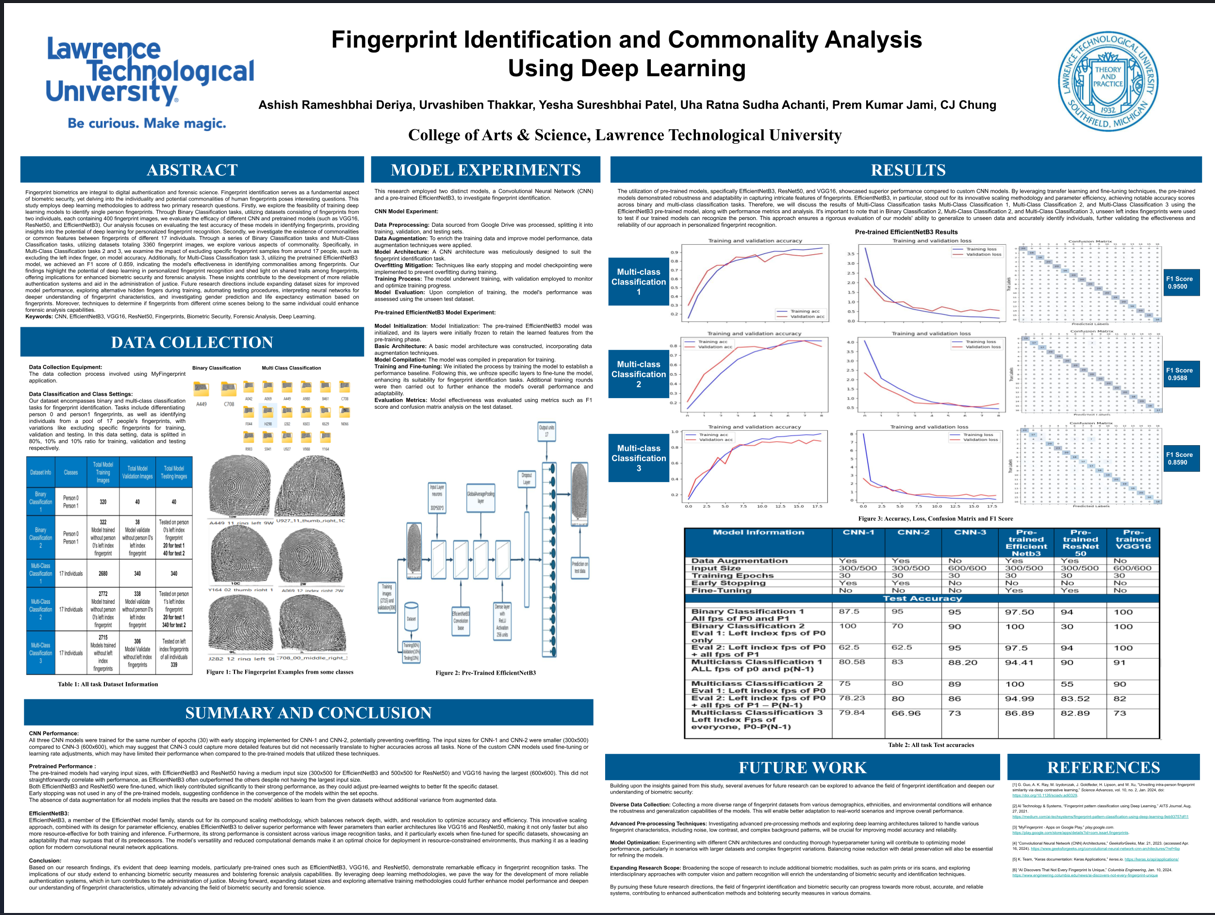

# **Result Table:**

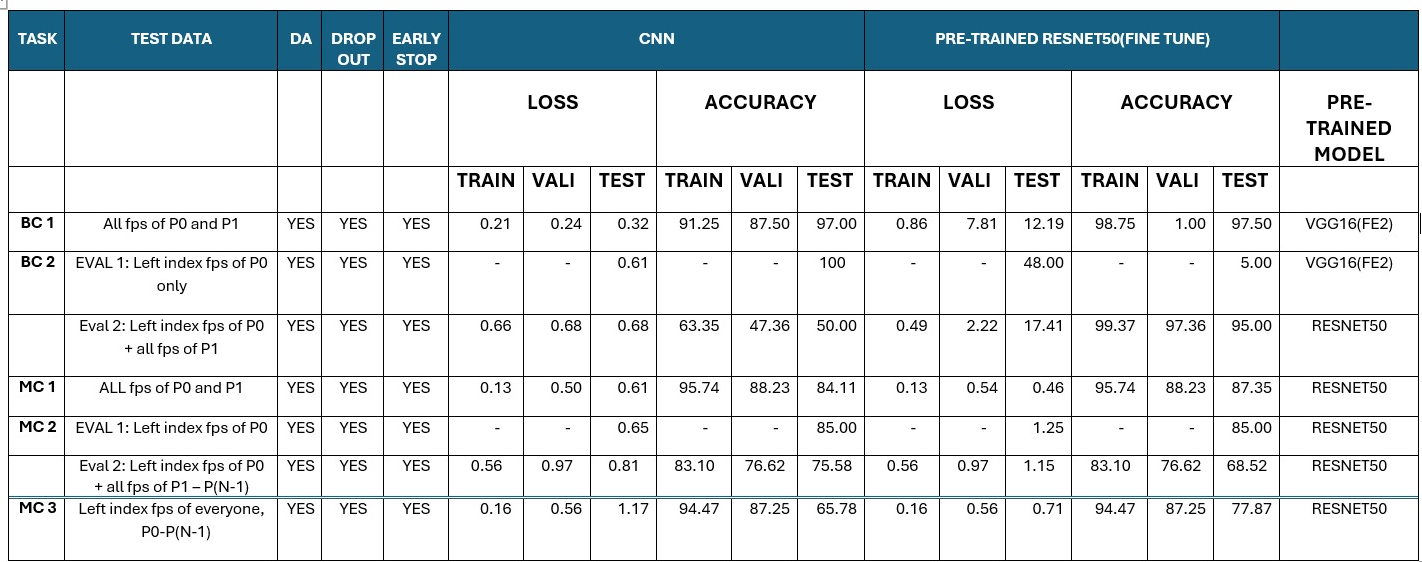

# **Summary:**


In this project firstly we have 5 tasks which are BC1, BC2, MC1, MC2, MC3. In this each task i used two model 1 is simple CNN and second is PRetrained VGG16 or ResNet50. In this all model Architechture i used various techniques like data augmentation, dropout, Early stopping, patience in early stopping best model save and various. In this project our models are not overfitted and give good accuracies. Also we anylysize all the process from Traning and validation ACuuracy and loss graphs.




Completeness: This project is complete and all the accuracies and losses are well mentioned in the result table.

Complexity and Size: In this project we add average ensenble code in every task and analyze the overall result.

Results: In this all file i displayed test dataset images in each and every model which are CNN and pretraines.

Visulization: In this project i have displayed all the results.

Creativity: In this project we found new thing which is MC3. in this task we did not used any left index fingurprints of any individuals. left index fingerprints are unseen test data set. So in this task we have good accuracy So we can say that somewhere commanalities are present in fingerprints. if we have more data then we will get better results than this.

